<h2>Feature Engineering (Dimension Reduction)</h2>
<br>
While our tree-based models are able to inherently perform feature selection, other models may be affected by potential noises from features that are not as useful. Hence, in this notebook, we attempt to reduce the dimension of our dataset. We will also scale our numerical variables as we attempt to improve the performance of our models that are likely affected by unscaled data (K-Nearest-Neighbours).

<h3>Importing of essential libraries</h3>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
sb.set(font_scale=2)

<h3>Importing our datasets</h3>

In [90]:
x_train = pd.read_csv('Data/x_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

x_test = pd.read_csv('Data/x_test.csv')
y_test = pd.read_csv('Data/y_test.csv')

<h3>Understanding our features</h3>
<br>
<br>1. Education: Highest education attainment
<br>2. Marital: Marital status
<br>3. Sex: Gender
<br>4. Age: Age
<br>5. Race: Race
<br>6. Veteran: Veteran status
<br>7. Pro_Cert: Possession of professional certificates
<br>8. Gov_Cert: Possession of government certificates
<br>9. Cert_Need: Whether the certification is needed for their job
<br>10. Disability: Disability Status
<br>11. Citizenship: Citizenship group
<br>12. Last Week Working Hrs: Last Week's Working Hours
<br>13. Less than 35hrs for at least 1 week: Whether respondent worked less than 35 hours for at least one week
<br>14. More than 35hrs weekly: Usually work more than 35 hours weekly
<br>15. Detailed Household Status: Detailed Household Status
<br>16. HrsWeek: Usual Weekly Working Hours
<br>17. Industry: Industry
<br>18. Occupation Group: Occupation Group
<br>19. Occupation: Occupation
<br>20. WorkClass: Work Class; private, government, self-employed etc
<br>21. Longest Industry: Longest Industry respondent was in
<br>22. Longest Job Class: Longest Work Class respondent was in
<br>
<br>We can split our predictor variables into categorical and numerical.

In [91]:
#numerical features
numerical = ['Age', 'Last Week Working Hrs', 'HrsWeek']

#categorical features
categorical = []
for feature in x_train.columns:
    if feature not in numerical:
        categorical.append(feature)

print('###Numerical###')
for feature in numerical:
    print(feature)
print()
print('###Categorical###')
for feature in categorical:
    print(feature)

###Numerical###
Age
Last Week Working Hrs
HrsWeek

###Categorical###
Education
Marital
Sex
Race
Veteran
Pro_Cert
Gov_Cert
Cert_Need
Disability
Citizenship
Less than 35hrs for at least 1 week
Detailed Household Status
More than 35hrs weekly
Industry
Occupation Group
Occupation
WorkClass
Longest Industry
Longest Job Class


<h3>Feature Transformation</h3>
<br>
We will scale our numerical data using the MinMax Scaler

In [92]:
x_train.loc[:,numerical]

,Age,Last Week Working Hrs,HrsWeek
0,23,60,45
1,39,60,40
2,19,15,20
3,50,0,30
4,33,0,50
...,...,...,...
51190,33,40,40
51191,61,30,30
51192,71,8,8
51193,32,80,40


In [93]:
scaler = MinMaxScaler().fit(x_train.loc[:,numerical])
x_train.loc[:,numerical] = scaler.transform(x_train.loc[:,numerical])
x_test.loc[:,numerical] = scaler.transform(x_test.loc[:,numerical])

The new scaled columns

In [94]:
x_train.loc[:,numerical]

,Age,Last Week Working Hrs,HrsWeek
0,0.114286,0.606061,0.448980
1,0.342857,0.606061,0.397959
2,0.057143,0.151515,0.193878
3,0.500000,0.000000,0.295918
4,0.257143,0.000000,0.500000
...,...,...,...
51190,0.257143,0.404040,0.397959
51191,0.657143,0.303030,0.295918
51192,0.800000,0.080808,0.071429
51193,0.242857,0.808081,0.397959


<h3>Dimension Reduction</h3>
<br>
We will perform dimension reduction through features selection. Since we have mostly categorical features, we will reduce the number of categorical features. To do this, we will use 2 methods: Mutual Information and Chi-2 Test to obtain the 15 most relevant features each and take the union of features identified by both methods.
<br>
<br><b>**We will only do it for the train dataset to avoid information leakage</b>

<b>Mutual Information</b>
<br>Mutual Information allows us to measure how related our feature is to our response variables.

In [95]:
#getting the score for MI: 0 is the worst, 1 is the best
MIscore = mutual_info_classif(x_train[categorical], y_train.values.ravel())

#mapping score to feature
featureMIScoreMap = {}
idx = 0
for var in categorical:
    featureMIScoreMap[var] = MIscore[idx]
    idx += 1

Occupation : 0.24866995116471946
Less than 35hrs for at least 1 week : 0.12424925709839307
Education : 0.12226432297143175
Occupation Group : 0.11867100557438492
Longest Industry : 0.09586694680866259
More than 35hrs weekly : 0.09258318088114459
Detailed Household Status : 0.06453934691995089
Industry : 0.06328110854554314
Marital : 0.04849125955930278
Cert_Need : 0.022669510478366295
WorkClass : 0.02245016757791296
Pro_Cert : 0.021712109572769478
Gov_Cert : 0.019880597732325977
Sex : 0.019349025035164225
Longest Job Class : 0.018499135976110637
Veteran : 0.013760484296965636
Citizenship : 0.0124466283204554
Race : 0.012352572246313809
Disability : 0.006655613588452347


<AxesSubplot:>

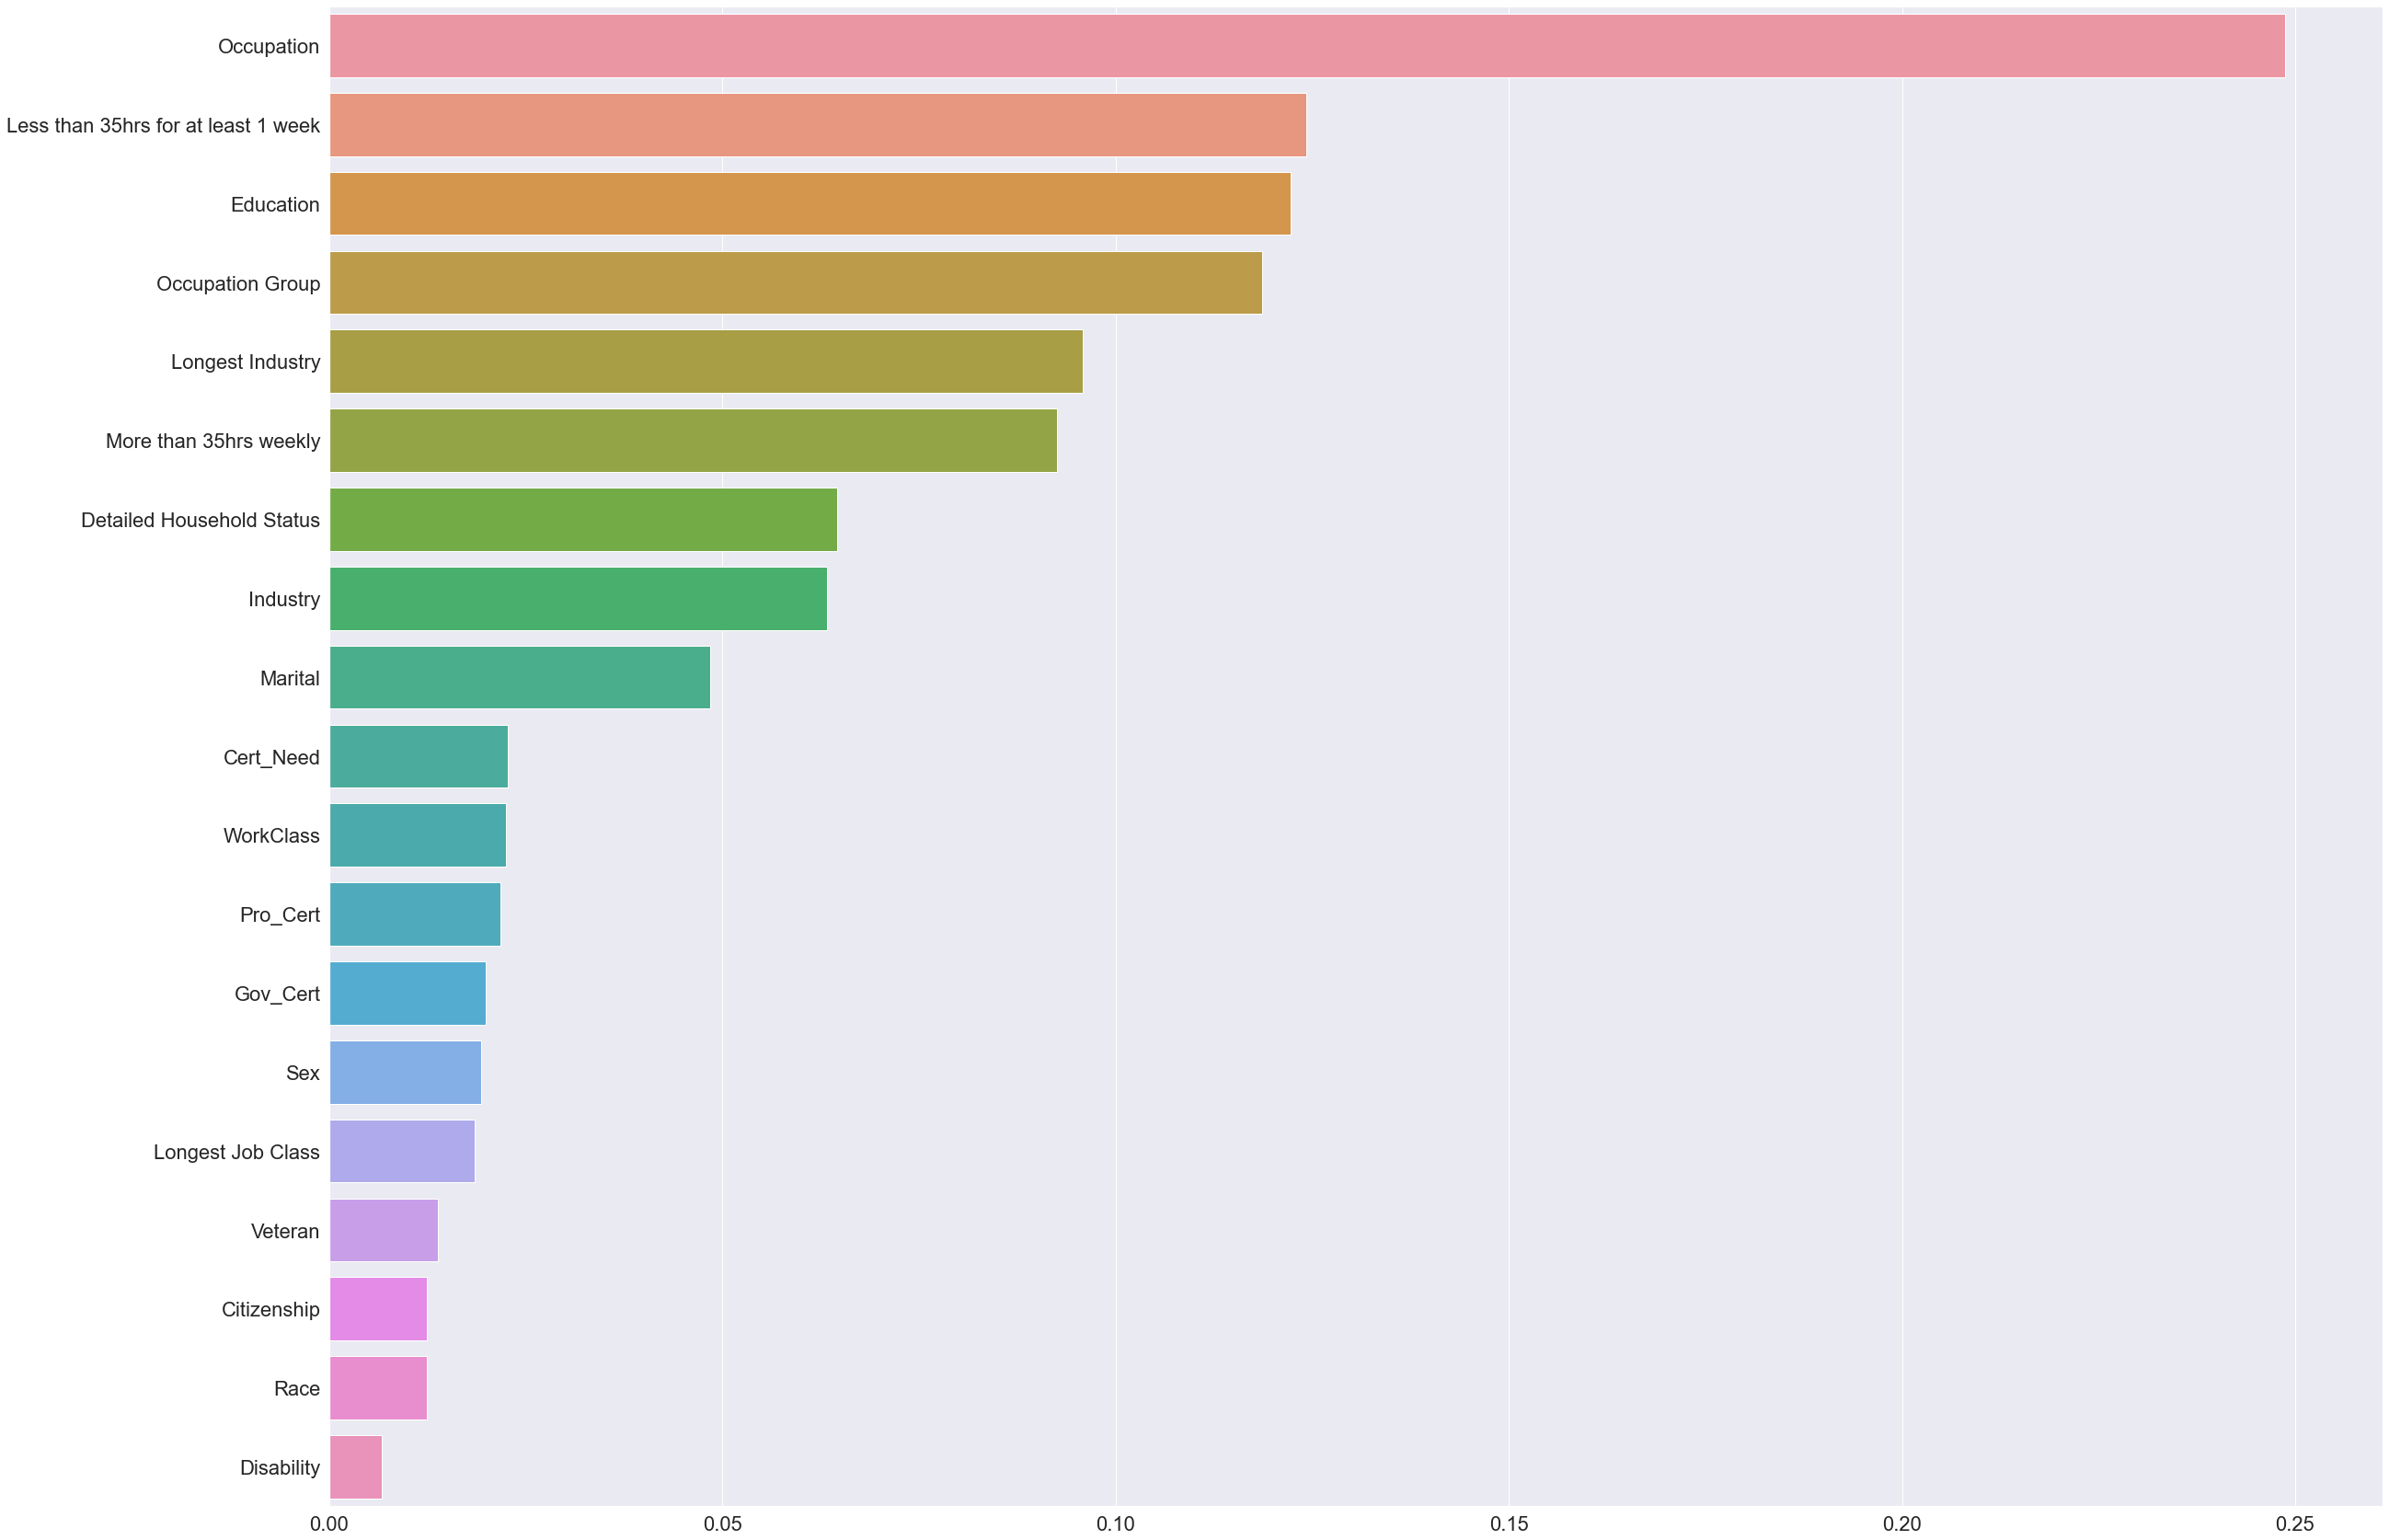

In [96]:
#visualising scores
sorted_keys = []
for key, value in sorted(featureMIScoreMap.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, ':', value)

f, axes = plt.subplots(figsize=(40, 30))
sb.barplot(y=list(featureMIScoreMap.keys()), x=list(featureMIScoreMap.values()), orient='h', order=sorted_keys, ax=axes)

<b>Insights</b>
<br>According to the MI scores, it appears that disability status is not an important feature. This seems to contradict what we found in EDA that disability tends to lead to lower income. However, it is consistent that citizenship, race and veteran status may not be that important

<b>Chi-Squared Test for Independence</b>
<br>We can also use the Chi-2 Test to measure the dependence between the features and our response variable. However, Chi-2 Test can only take in non-negative values. Hence, we need to adjust the scale of our features.

In [97]:
#find out features with negative levels
negCol = []
for col in categorical:
    for value in list((x_train[col]>=0)):
        if value==False:
            negCol.append(col)
            print(col)
            break

Veteran
Gov_Cert
Cert_Need


In [98]:
#check out levels of these features
for col in negCol:
    print('###', col, '###')
    print(x_train[col].unique())
    print()

### Veteran ###
[ 2  1 -1]

### Gov_Cert ###
[-1  1  2]

### Cert_Need ###
[-1  2  1]



In [99]:
#Since their minimum level is -1, we will shift each categorical class by adding 1
new_x = pd.DataFrame()

for col in categorical:
    if col in negCol:
        new_x[col] = x_train[col] + 1
    else:
        new_x[col] = x_train[col]

In [100]:
#check out new levels of those features
for col in negCol:
    print('###', col, '###')
    print(new_x[col].unique())
    print()

### Veteran ###
[3 2 0]

### Gov_Cert ###
[0 2 3]

### Cert_Need ###
[0 3 2]



In [101]:
#fit into chi-2 test
pScore = chi2(new_x[categorical], y_train.values.ravel())[1]

#mapping score to feature
featurePScoreMap = {}
idx = 0
for var in categorical:
    featurePScoreMap[var] = pScore[idx]
    idx += 1

In [102]:
#visualising scores
sorted_keys = []
for key, value in sorted(featurePScoreMap.items(), key=lambda x: x[1], reverse=True):
    sorted_keys.append(key)
    print(key, ':', value)

Disability : 0.4537402007277509
Veteran : 0.22151875612092423
Race : 1.2228736395956913e-06
Longest Job Class : 3.427751770507403e-13
Industry : 4.984059473715531e-33
Pro_Cert : 4.0002841568913574e-44
Citizenship : 9.7997660792459e-62
WorkClass : 3.9272609846339284e-65
Sex : 1.1820928452009293e-68
Longest Industry : 3.873866133204988e-134
Education : 0.0
Marital : 0.0
Gov_Cert : 0.0
Cert_Need : 0.0
Less than 35hrs for at least 1 week : 0.0
Detailed Household Status : 0.0
More than 35hrs weekly : 0.0
Occupation Group : 0.0
Occupation : 0.0


We see that p score of Disability and Veteran are significantly higher than the rest of the features so we may attempt to remove those columns.
<br>
<br>
However, the p score of all features are belo 0.05, suggesting that there is significant dependence between the feature and salary. Removing features may not improve our model's performance and may instead reduce its performance. However, we will still attempt to reduce the dimension to see the difference.

In [103]:
x_train = x_train.drop(columns=['Disability', 'Veteran'])
x_test = x_test.drop(columns=['Disability', 'Veteran'])

<b>Exporting a new set of csv files</b>

In [86]:
x_train.to_csv('Data/x_trainEGIN.csv', index=False)
x_test.to_csv('Data/x_testEGIN.csv', index=False)